<a href="https://colab.research.google.com/github/IshaVishwas/StudentRoutineAnalysis/blob/main/StudentRoutineAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the CSV file
file_path = '/content/student_survey_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Display the first few rows to verify data loading
print(df.head())


   Age Year Primary_Area_of_Study  Study_Hours  Exercise_Hours  Sleep_Hours  \
0   24  4th               Biology     4.061576        1.091928     8.478252   
1   21  2nd           Mathematics     4.216308        1.288949     6.120532   
2   22  3rd               Biology     5.019551        2.067321     6.208280   
3   24  4th               Physics     5.566654        1.113424     5.828023   
4   20  1st               Biology     5.094237        1.827731     5.413536   

   Social_Hours  Class_Hours  Other_Hours Difficulty_in_Routine  \
0      3.212156     3.000000     2.789983              Moderate   
1      1.855951     5.241714     2.052460              Moderate   
2      2.128041     6.000000     1.444250                  High   
3      1.518662     3.000000     1.000000                   Low   
4      0.851945     3.000000     3.161353              Moderate   

  Time_Management_Challenge  Total_Hours  
0                       NaN    22.633895  
1                  Somewhat    20.77

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Age                           0
Year                          0
Primary_Area_of_Study         0
Study_Hours                   0
Exercise_Hours                0
Sleep_Hours                   0
Social_Hours                  0
Class_Hours                   0
Other_Hours                   0
Difficulty_in_Routine         0
Time_Management_Challenge    32
Total_Hours                   0
dtype: int64


In [4]:
# Find the most frequent value (mode) in 'Time_Management_Challenge'
mode_value = df['Time_Management_Challenge'].mode()[0]

# Fill NaN values with the mode (most frequent value)
df['Time_Management_Challenge'] = df['Time_Management_Challenge'].fillna(mode_value)

# Verify the result
print(df[['Time_Management_Challenge']].head())


  Time_Management_Challenge
0               Significant
1                  Somewhat
2                  Somewhat
3               Significant
4                  Somewhat


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                          0
Year                         0
Primary_Area_of_Study        0
Study_Hours                  0
Exercise_Hours               0
Sleep_Hours                  0
Social_Hours                 0
Class_Hours                  0
Other_Hours                  0
Difficulty_in_Routine        0
Time_Management_Challenge    0
Total_Hours                  0
dtype: int64


In [6]:
# Display summary statistics
summary_statistics = df.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
               Age  Study_Hours  Exercise_Hours  Sleep_Hours  Social_Hours  \
count  100.000000   100.000000      100.000000   100.000000    100.000000   
mean    21.210000     4.751848        1.099806     6.969174      2.035539   
std      1.913773     1.561339        0.468915     0.983239      1.016845   
min     18.000000     1.000000        0.500000     5.000000      0.000000   
25%     19.750000     3.562273        0.704770     6.289283      1.284975   
50%     21.000000     4.808495        1.071015     6.902429      2.053701   
75%     23.000000     5.714280        1.443449     7.778143      2.656831   
max     24.000000     8.410018        2.593517     8.727748      4.172842   

       Class_Hours  Other_Hours  Total_Hours  
count   100.000000   100.000000   100.000000  
mean      4.154711     3.035987    22.047064  
std       0.921403     1.035869     2.323225  
min       3.000000     1.000000    17.621493  
25%       3.357410     2.316015    20.606841  
50

In [7]:
average_study_hours = df['Study_Hours'].mean()
df['Focus_Level'] = df['Study_Hours'].apply(lambda x: 1 if x > average_study_hours else 0)
print(df[['Study_Hours', 'Focus_Level']].head())

   Study_Hours  Focus_Level
0     4.061576            0
1     4.216308            0
2     5.019551            1
3     5.566654            1
4     5.094237            1


In [8]:
df['Activity_Balance'] = (df['Study_Hours'] + df['Class_Hours']) / (df['Exercise_Hours'] + df['Social_Hours'] + 0.01)
print(df[['Study_Hours', 'Class_Hours', 'Exercise_Hours', 'Social_Hours', 'Activity_Balance']].head())

   Study_Hours  Class_Hours  Exercise_Hours  Social_Hours  Activity_Balance
0     4.061576     3.000000        1.091928      3.212156          1.636865
1     4.216308     5.241714        1.288949      1.855951          2.997884
2     5.019551     6.000000        2.067321      2.128041          2.620357
3     5.566654     3.000000        1.113424      1.518662          3.242383
4     5.094237     3.000000        1.827731      0.851945          3.009373


In [9]:
df['Year'] = df['Year'].map({'1st': 1, '2nd': 2, '3rd': 3, '4th': 4})
df['Primary_Area_of_Study'] = df['Primary_Area_of_Study'].astype('category').cat.codes
df['Difficulty_in_Routine'] = df['Difficulty_in_Routine'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df['Time_Management_Challenge'] = df['Time_Management_Challenge'].map({'None': 0, 'Somewhat': 1, 'Significant': 2})
print(df[['Year', 'Primary_Area_of_Study', 'Difficulty_in_Routine', 'Time_Management_Challenge']].head())

   Year  Primary_Area_of_Study  Difficulty_in_Routine  \
0     4                      0                      1   
1     2                      3                      1   
2     3                      0                      2   
3     4                      4                      0   
4     1                      0                      1   

   Time_Management_Challenge  
0                          2  
1                          1  
2                          1  
3                          2  
4                          1  


In [10]:
def suggest_routine(student_data):
    # Get current day's study hours, sleep, exercise, and focus level
    study_hours = student_data['Study_Hours']
    sleep_hours = student_data['Sleep_Hours']
    exercise_hours = student_data['Exercise_Hours']
    focus_level = student_data['Focus_Level']  # 1 = High, 0 = Low

    # Start with a base suggestion
    suggestion = {
        'Study_Hours': 6,  # Default recommendation
        'Exercise_Hours': 1,  # Default recommendation
        'Sleep_Hours': 8,  # Default recommendation
    }

    # Adjust based on the current day's activity
    if study_hours > 6:  # If the student studied more than 6 hours
        suggestion['Study_Hours'] = 4  # Suggest less study time

    if sleep_hours < 7:  # If the student slept less than 7 hours
        suggestion['Sleep_Hours'] = 9  # Suggest more sleep time

    if exercise_hours < 1:  # If the student exercised less than 1 hour
        suggestion['Exercise_Hours'] = 2  # Suggest more exercise time

    if focus_level == 0:  # If focus level was low today
        suggestion['Study_Hours'] += 1  # Suggest more focused study time next day

    return suggestion


In [11]:
import ipywidgets as widgets
from IPython.display import display

def suggest_routine(study_hours, sleep_hours, exercise_hours, focus_level):
    # Placeholder logic for suggestion
    suggestion = {
        'Study Hours': 6,  # Default recommendation
        'Exercise Hours': 1,  # Default recommendation
        'Sleep Hours': 8,  # Default recommendation
    }

    # Adjusting based on the current day's activity
    if study_hours > 6:  # If the student studied more than 6 hours
        suggestion['Study Hours'] = 4  # Suggest less study time
    elif study_hours < 5:  # If the student studied less than 5 hours
        suggestion['Study Hours'] = 7  # Suggest more study time

    if sleep_hours < 7:  # If the student slept less than 7 hours
        suggestion['Sleep Hours'] = 9  # Suggest more sleep time
    elif sleep_hours > 9:  # If the student slept more than 9 hours
        suggestion['Sleep Hours'] = 8  # Suggest less sleep time

    if exercise_hours < 1:  # If the student exercised less than 1 hour
        suggestion['Exercise Hours'] = 2  # Suggest more exercise time
    elif exercise_hours > 2:  # If the student exercised more than 2 hours
        suggestion['Exercise Hours'] = 1  # Suggest less exercise time

    # Adjust study time based on focus level
    if focus_level == 0:  # If focus level was low today
        suggestion['Study Hours'] += 1  # Suggest more focused study time next day

    return suggestion

def show_routine(study_hours, sleep_hours, exercise_hours, focus_level):
    suggested_routine = suggest_routine(study_hours, sleep_hours, exercise_hours, focus_level)
    # Output the suggested routine
    print(f"Suggested Routine:\nStudy Hours: {suggested_routine['Study Hours']}\n"
          f"Exercise Hours: {suggested_routine['Exercise Hours']}\n"
          f"Sleep Hours: {suggested_routine['Sleep Hours']}")

# Creating widgets
study_hour_input = widgets.IntText(description="Study Hours", value=6)
sleep_hour_input = widgets.IntText(description="Sleep Hours", value=8)
exercise_hour_input = widgets.IntText(description="Exercise Hours", value=1)
focus_level_input = widgets.Dropdown(description="Focus Level", options=[0, 1], value=1)

# Button to trigger suggestion
button = widgets.Button(description="Get Suggested Routine")
button.on_click(lambda x: show_routine(study_hour_input.value, sleep_hour_input.value,
                                       exercise_hour_input.value, focus_level_input.value))

# Display the widgets
display(study_hour_input, sleep_hour_input, exercise_hour_input, focus_level_input, button)


IntText(value=6, description='Study Hours')

IntText(value=8, description='Sleep Hours')

IntText(value=1, description='Exercise Hours')

Dropdown(description='Focus Level', index=1, options=(0, 1), value=1)

Button(description='Get Suggested Routine', style=ButtonStyle())

In [12]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Simulating some example data for demonstration
data = {
    'Study_Hours': [6, 7, 8, 5, 4, 3, 6, 7, 8, 6],
    'Exercise_Hours': [1, 2, 0, 1, 2, 0, 1, 2, 1, 2],
    'Sleep_Hours': [8, 7, 6, 8, 9, 8, 7, 6, 6, 7]
}
df = pd.DataFrame(data)

# Binarize the continuous variables
df['Study_Hours'] = df['Study_Hours'].apply(lambda x: 1 if x >= 6 else 0)  # 1 for High Study Hours, 0 for Low
df['Exercise_Hours'] = df['Exercise_Hours'].apply(lambda x: 1 if x >= 1 else 0)  # 1 for Exercise, 0 for None
df['Sleep_Hours'] = df['Sleep_Hours'].apply(lambda x: 1 if x >= 7 else 0)  # 1 for Good Sleep, 0 for Low Sleep

# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
print(rules)


                  antecedents                 consequents  antecedent support  \
0            (Exercise_Hours)               (Study_Hours)                 0.8   
1               (Study_Hours)            (Exercise_Hours)                 0.7   
2            (Exercise_Hours)               (Sleep_Hours)                 0.8   
3               (Sleep_Hours)            (Exercise_Hours)                 0.7   
4  (Study_Hours, Sleep_Hours)            (Exercise_Hours)                 0.4   
5            (Exercise_Hours)  (Study_Hours, Sleep_Hours)                 0.8   

   consequent support  support  confidence      lift  leverage  conviction  \
0                 0.7      0.6    0.750000  1.071429      0.04         1.2   
1                 0.8      0.6    0.857143  1.071429      0.04         1.4   
2                 0.7      0.6    0.750000  1.071429      0.04         1.2   
3                 0.8      0.6    0.857143  1.071429      0.04         1.4   
4                 0.8      0.4    1.000000

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


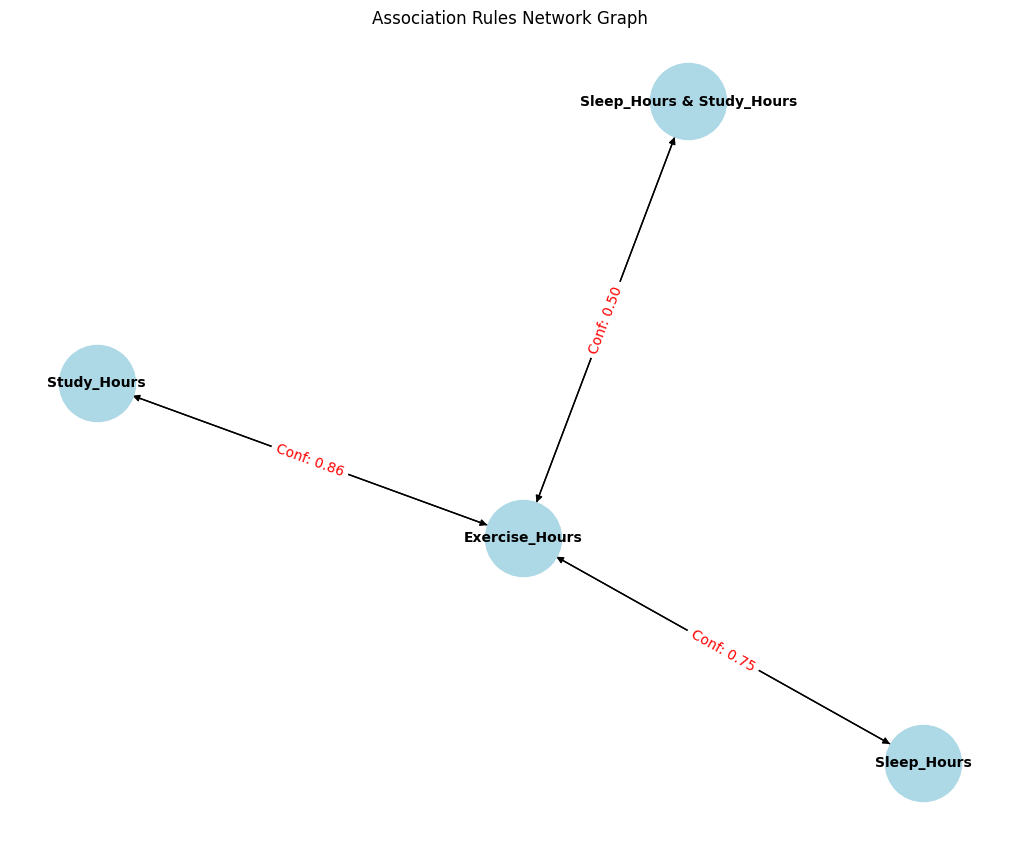

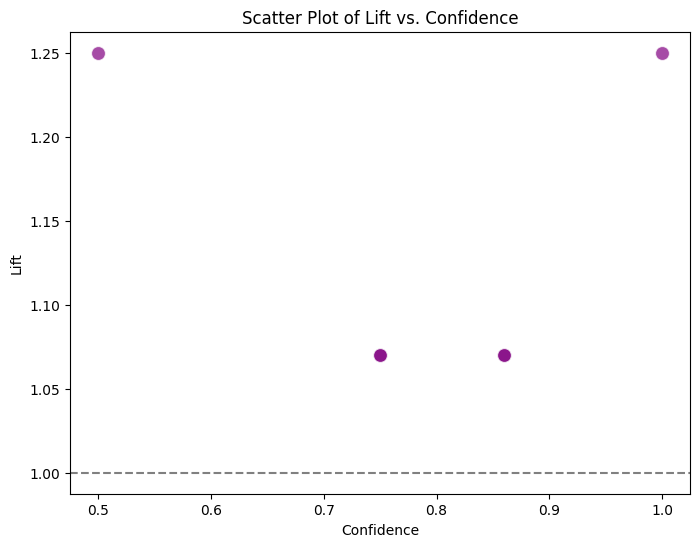

<Figure size 1200x600 with 0 Axes>

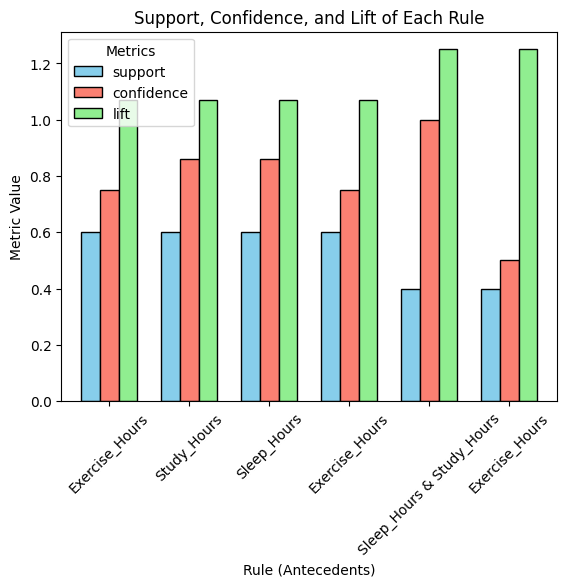

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data of association rules (similar to your results)
data = {
    'antecedents': [
        'Exercise_Hours', 'Study_Hours', 'Sleep_Hours', 'Exercise_Hours',
        'Sleep_Hours & Study_Hours', 'Exercise_Hours'
    ],
    'consequents': [
        'Study_Hours', 'Exercise_Hours', 'Exercise_Hours', 'Sleep_Hours',
        'Exercise_Hours', 'Sleep_Hours & Study_Hours'
    ],
    'support': [0.6, 0.6, 0.6, 0.6, 0.4, 0.4],
    'confidence': [0.75, 0.86, 0.86, 0.75, 1.0, 0.5],
    'lift': [1.07, 1.07, 1.07, 1.07, 1.25, 1.25]
}
rules_df = pd.DataFrame(data)

# Network Graph Visualization
plt.figure(figsize=(10, 8))
G = nx.DiGraph()

for i, row in rules_df.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])

pos = nx.spring_layout(G, k=1.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
edge_labels = {(row['antecedents'], row['consequents']): f"Conf: {row['confidence']:.2f}" for _, row in rules_df.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")
plt.title("Association Rules Network Graph")
plt.show()

# Scatter Plot of Lift vs. Confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(x='confidence', y='lift', data=rules_df, s=100, color='purple', edgecolor="w", alpha=0.7)
plt.title("Scatter Plot of Lift vs. Confidence")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.axhline(1, color='grey', linestyle='--')  # Lift threshold line
plt.show()

# Bar Plot for Support, Confidence, and Lift for each rule
plt.figure(figsize=(12, 6))
rules_df.set_index('antecedents').loc[:, ['support', 'confidence', 'lift']].plot(kind='bar', width=0.7, color=['skyblue', 'salmon', 'lightgreen'], edgecolor="k")
plt.title("Support, Confidence, and Lift of Each Rule")
plt.xlabel("Rule (Antecedents)")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()
